## Graph features

In [1]:
from IPython.display import display
from PIL import Image

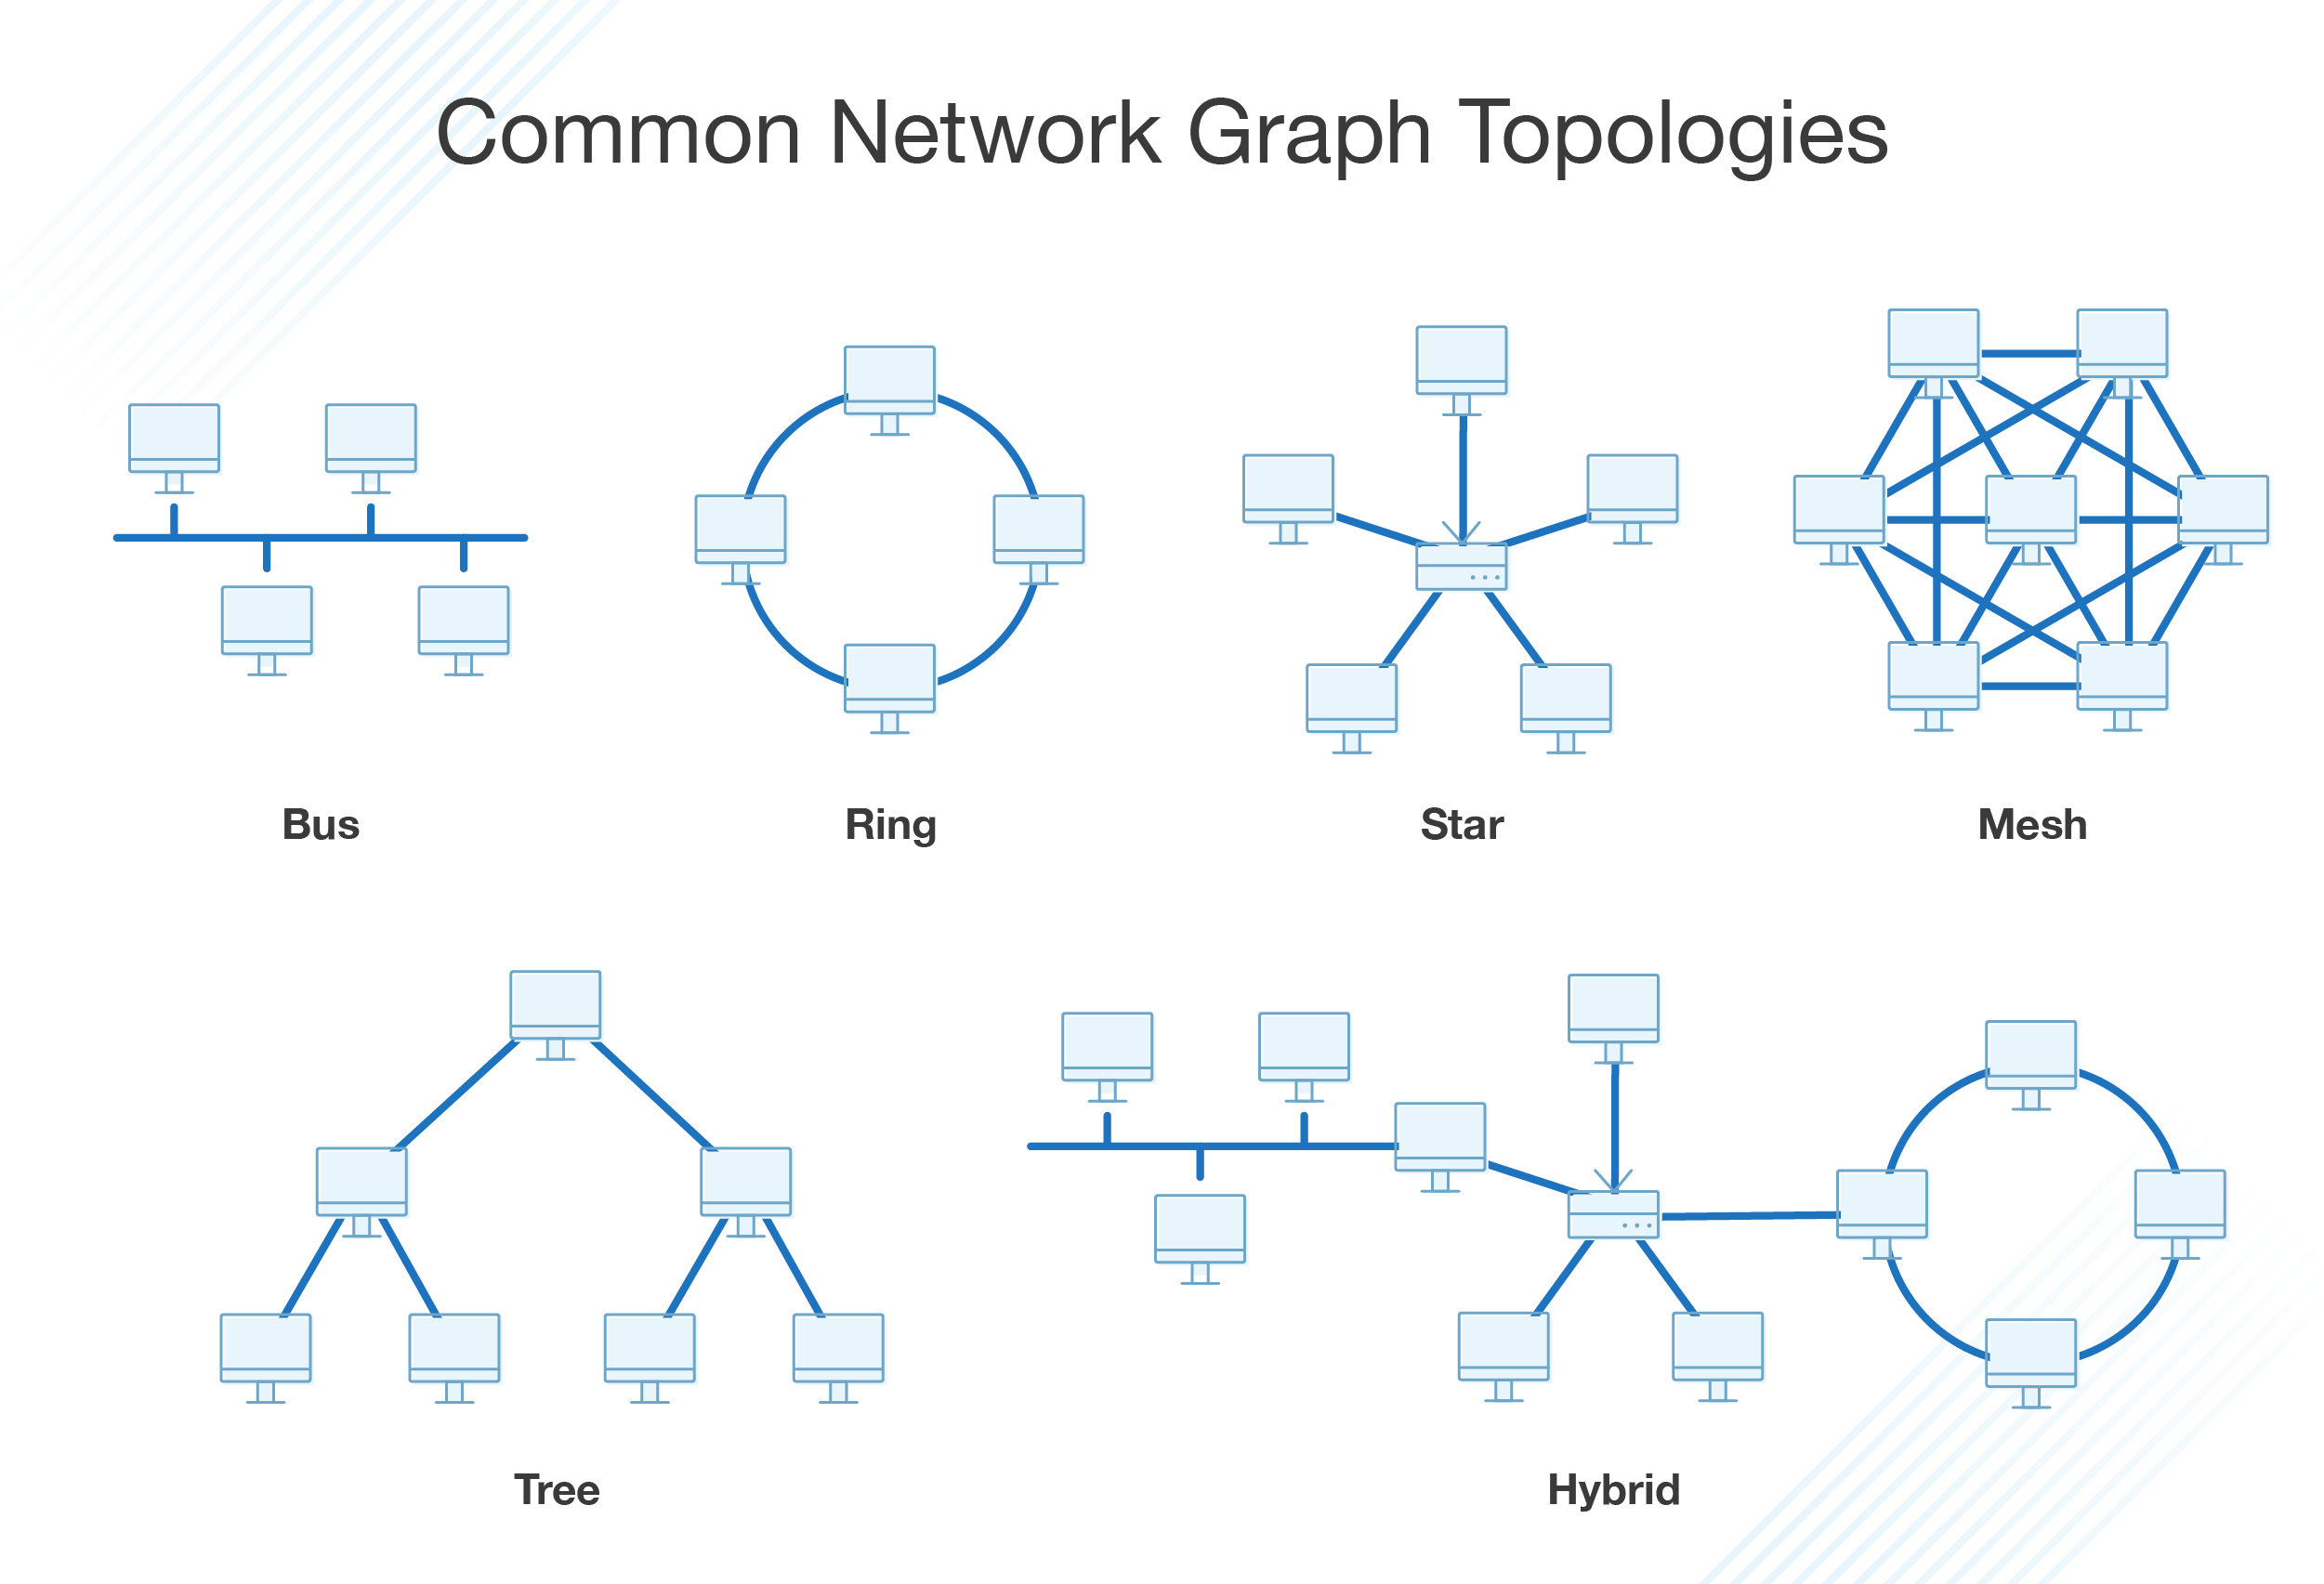

In [2]:
# common graph topologies
path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\graph-topologies.jpg"
display(Image.open(path))

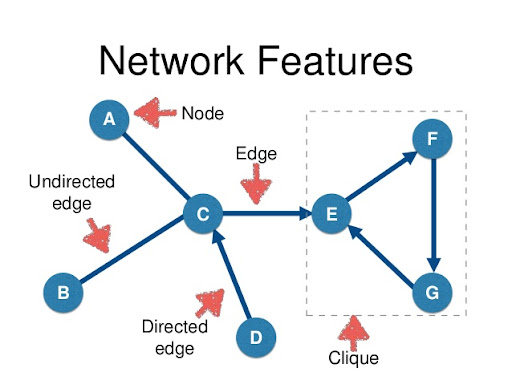

In [6]:
# What is a graph
path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\graph-features.jpg"
display(Image.open(path))

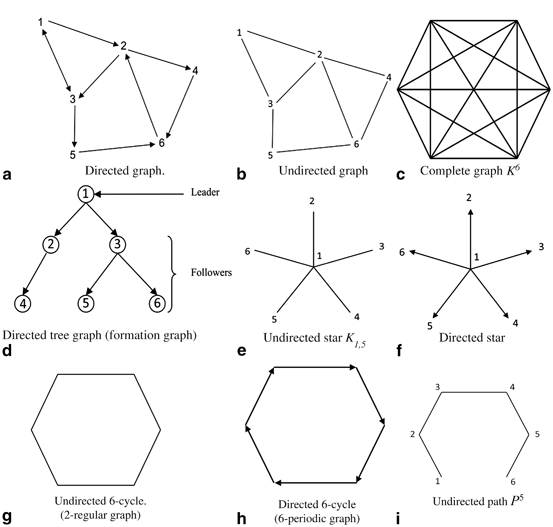

In [7]:
# Graph types
path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\graph-types.gif"
display(Image.open(path))

### How to draw graphs

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import networkx as nx # the most important library to handle graphs with pythok

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 6
sb.set_style('whitegrid')

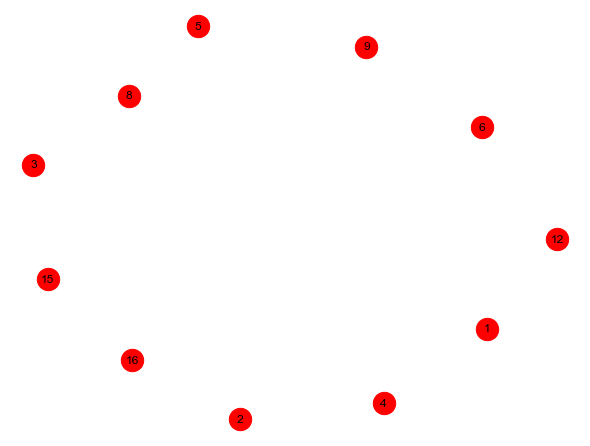

In [6]:
# Creating graph objects
G = nx.Graph()

#Adding first node
G.add_node(1)

#Adding more nodes
G.add_nodes_from([2,3,4,5,6,8,9,12,15,16])

#Drawing the graph
nx.draw(G, with_labels=True, node_size=500, node_color='red')

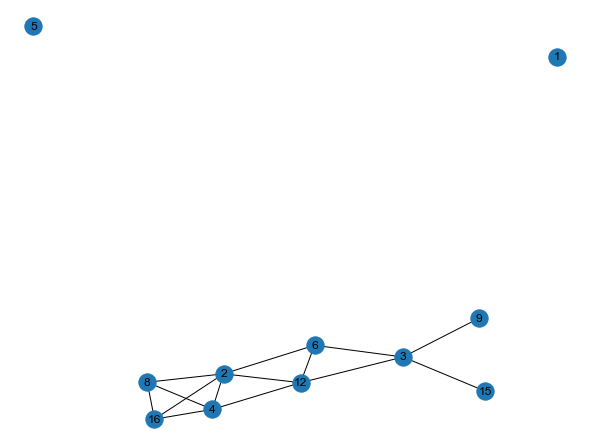

In [9]:
#Adding edges
G.add_edges_from([(2,4),(2,6),(2,8),(2,12),(2,16),(3,6),(3,9), (3,12),(3,15),(4,8),(4,12),(4,16),(6,12),(8,16)])

#Drawing the graph
nx.draw(G, with_labels=True, node_size=300)

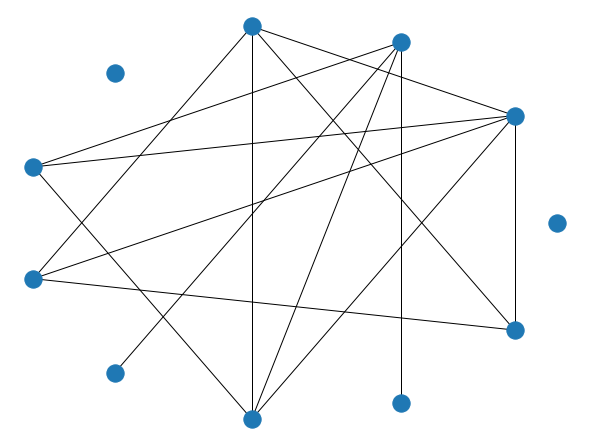

In [13]:
#Drawing the graph in circular mode
nx.draw_circular(G)

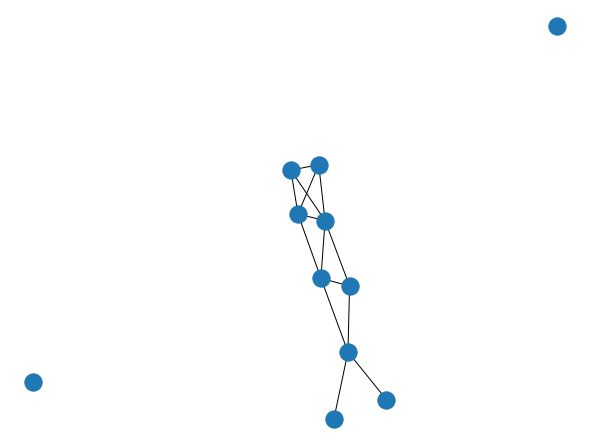

In [14]:
#Drawing the graph in spring mode
nx.draw_spring(G)

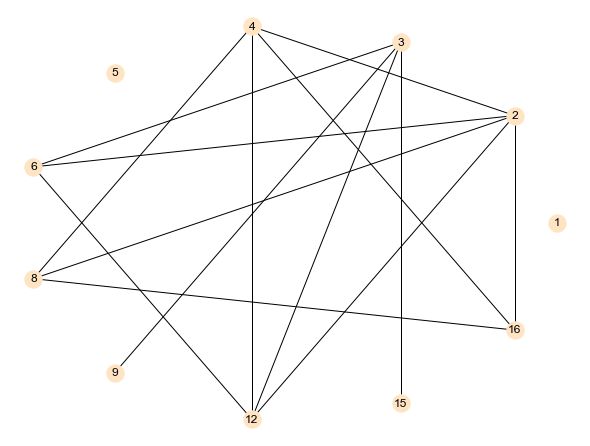

In [15]:
#Labeling and coloring graph nodes
nx.draw_circular(G, node_color='bisque', with_labels=True)

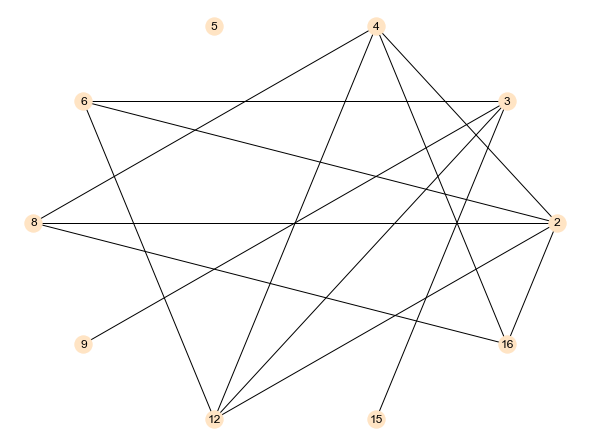

In [16]:
#Removing a node
G.remove_node(1)
nx.draw_circular(G, node_color='bisque', with_labels=True)

### Identifying graph properties

In [17]:
sum_stats = nx.info(G)
print(sum_stats)

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 14
Average degree:   2.8000


In [18]:
#Viewing degree of each node 
print(nx.degree(G))

[(2, 5), (3, 4), (4, 4), (5, 0), (6, 3), (8, 3), (9, 1), (12, 4), (15, 1), (16, 3)]


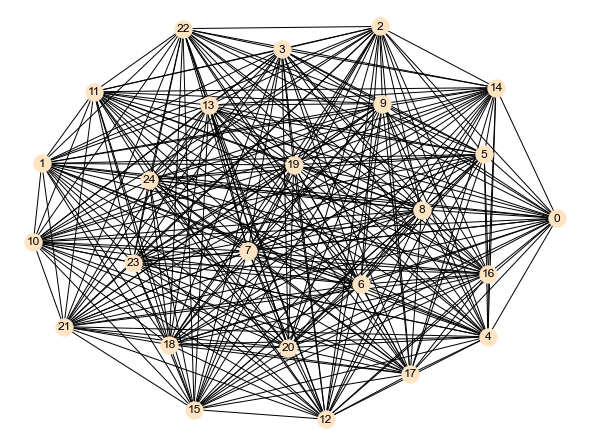

In [40]:
#Using graph generators
#Creating a complete graph
G = nx.complete_graph(25)
nx.draw(G, node_color='bisque', with_labels=True)

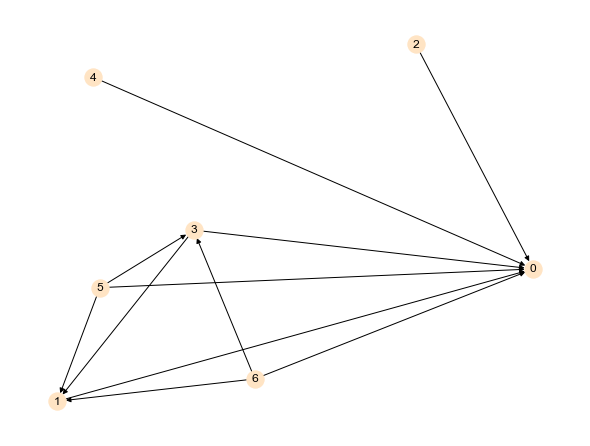

In [5]:
#Cerating a random directed graph with 7 nodes
G = nx.gnc_graph(7, seed=1)
nx.draw(G, node_color='bisque', with_labels=True)

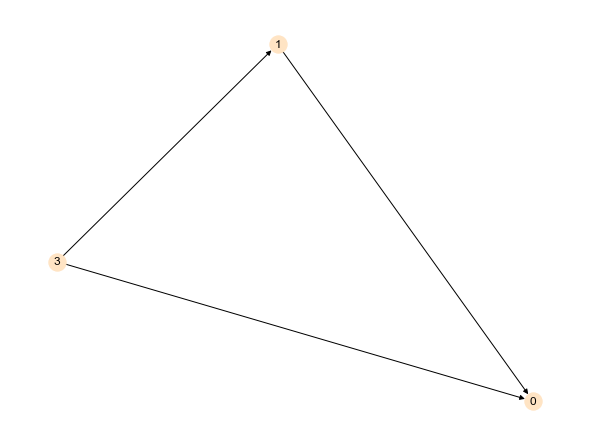

In [6]:
#Using sub graph generator.
ego_G = nx.ego_graph(G, 3, radius=5)
nx.draw(ego_G, node_color='bisque', with_labels=True)

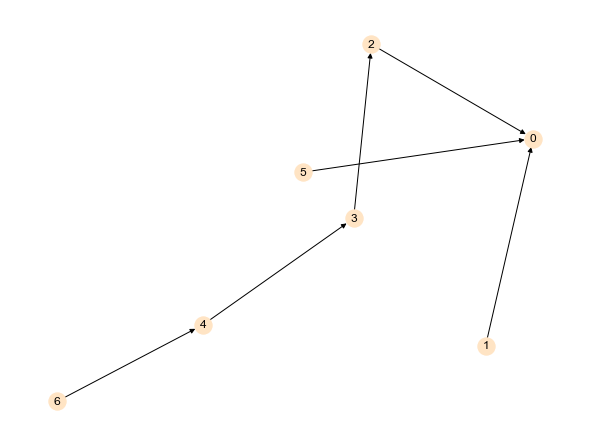

In [10]:
#Simulating a social network (ie; directed network analysis)
#Generating a graph object and edgelist
DG = nx.gn_graph(7, seed=25)
nx.draw(DG, node_color='bisque', with_labels=True)

In [14]:
# show edges (from .. to)
for line in nx.generate_edgelist(DG, data=False):
    print(line)

1 0
2 0
3 2
4 3
5 0
6 4


In [18]:
#Viewing node attributes (it's currently empty)
print(DG.nodes[0])

{}


In [19]:
#Assigning attributes to nodes
DG.nodes[0]['name'] = 'Alice'
print(DG.nodes[0])

{'name': 'Alice'}


In [20]:
DG.nodes[1]['name'] = 'Bob'
DG.nodes[2]['name'] = 'Claire'
DG.nodes[3]['name'] = 'Dennis'
DG.nodes[4]['name'] = 'Esther'
DG.nodes[5]['name'] = 'Frank'
DG.nodes[6]['name'] = 'George'

In [21]:
#Adding age attribute using add_nodes_from
DG.add_nodes_from([(0,{'age':25}),(1,{'age':31}),(2,{'age':18}),(3,{'age':47}),(4,{'age':22}),
                   (5,{'age':23}),(6,{'age':50})])

In [22]:
#Adding gender
DG.nodes[0]['gender'] = 'f'
DG.nodes[1]['gender'] = 'm'
DG.nodes[2]['gender'] = 'f'
DG.nodes[3]['gender'] = 'm'
DG.nodes[4]['gender'] = 'f'
DG.nodes[5]['gender'] = 'm'
DG.nodes[6]['gender'] = 'm'

In [24]:
#Viewing node attributes (it is 3 now)
print(DG.nodes[0])

{'name': 'Alice', 'age': 25, 'gender': 'f'}


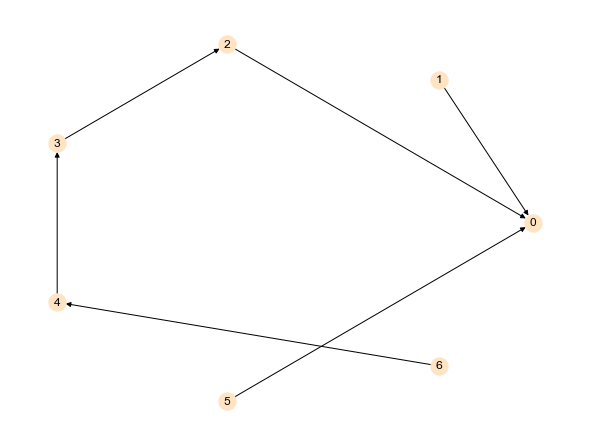

In [25]:
#Visualizing the network graph
nx.draw_circular(DG, node_color='bisque', with_labels=True)

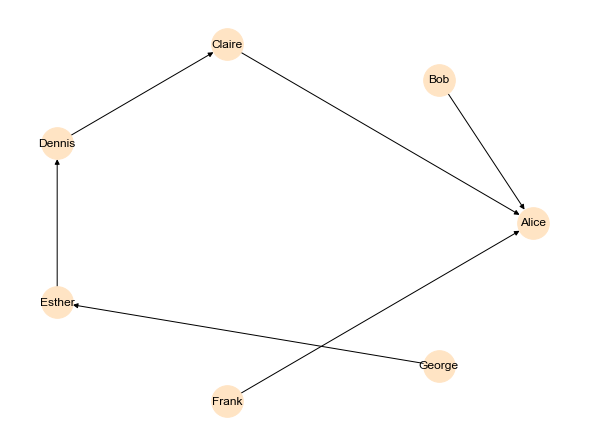

In [27]:
#Labeling the graph nodes using names instead of node numbers

labeldict = {0: 'Alice',1:'Bob',2:'Claire',3:'Dennis',4:'Esther',5:'Frank',6:'George'}
nx.draw_circular(DG, labels=labeldict, node_color='bisque', with_labels=True, node_size=1000)

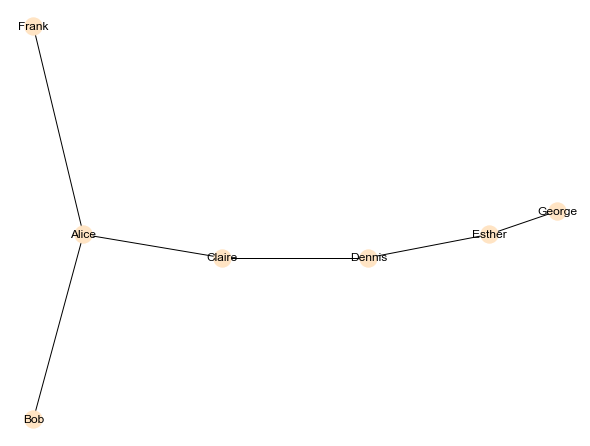

In [54]:
#Transforming the directed graph to undirected
G = DG.to_undirected()
nx.draw_spectral(G, labels=labeldict, node_color='bisque', with_labels=True)

In [28]:
print(nx.info(DG))

Name: 
Type: DiGraph
Number of nodes: 7
Number of edges: 6
Average in degree:   0.8571
Average out degree:   0.8571


In [29]:
#Considering degrees in a social network
#We can use degree in a directed graph to identify the most influential node
#Alice is the most influential in this graph
DG.degree()

DiDegreeView({0: 3, 1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1})

[2]

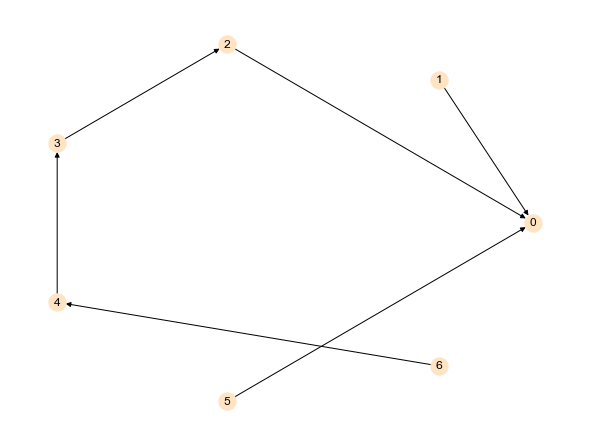

In [30]:
#Identifying successor nodes (nodes that can replace original nodes)
nx.draw_circular(DG, node_color='bisque', with_labels=True)
#Let's find node 3's successor
list(DG.successors(3))

In [33]:
#Identifying neighbors (only out connections are considered)
list(DG.neighbors(4))

[3]

[0]

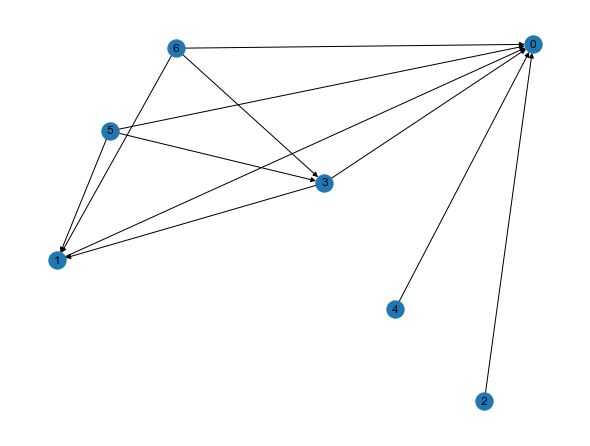

In [32]:
#Identifying neighbors
nx.draw(G,with_labels=True)
list(G.neighbors(4))